In [36]:
import pandas as pd
import numpy as np

# Charger le jeu de données
df = pd.read_csv('Thyroid_Diff.csv')

# Afficher les premières lignes du jeu de données
print(df.head())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Charger les données
df = pd.read_csv('Thyroid_Diff.csv')

# Encoder les variables catégorielles
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Smoking'] = encoder.fit_transform(df['Smoking'])
df['Hx Smoking'] = encoder.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy'] = encoder.fit_transform(df['Hx Radiothreapy'])
df['Thyroid Function'] = encoder.fit_transform(df['Thyroid Function'])
df['Physical Examination'] = encoder.fit_transform(df['Physical Examination'])
df['Adenopathy'] = encoder.fit_transform(df['Adenopathy'])
df['Pathology'] = encoder.fit_transform(df['Pathology'])
df['Focality'] = encoder.fit_transform(df['Focality'])
df['Risk'] = encoder.fit_transform(df['Risk'])
df['T'] = encoder.fit_transform(df['T'])
df['N'] = encoder.fit_transform(df['N'])
df['M'] = encoder.fit_transform(df['M'])
df['Stage'] = encoder.fit_transform(df['Stage'])
df['Response'] = encoder.fit_transform(df['Response'])
df['Recurred'] = encoder.fit_transform(df['Recurred'])

# Supprimer les colonnes non pertinentes pour l'analyse PCA
df = df.drop(columns=['Age', 'Response'])

# Séparer les variables indépendantes (X) de la variable cible (y)
X = df.drop(columns=['Recurred'])
y = df['Recurred']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer PCA pour réduire la dimensionnalité sur l'ensemble d'entraînement seulement
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialiser les classificateurs
svm_model = SVC()
rf_model = RandomForestClassifier()
mlp_model = MLPClassifier(max_iter=1000)

# Entraîner les modèles avec les données avant PCA
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
mlp_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données avant PCA
svm_pred = svm_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
mlp_pred = mlp_model.predict(X_test_scaled)

# Calculer les scores d'exactitude sur les données avant PCA
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

print("SVM Accuracy (before PCA):", svm_accuracy)
print("Random Forest Accuracy (before PCA):", rf_accuracy)
print("MLP Accuracy (before PCA):", mlp_accuracy)

# Entraîner les modèles avec les données après PCA
svm_model.fit(X_train_pca, y_train)
rf_model.fit(X_train_pca, y_train)
mlp_model.fit(X_train_pca, y_train)

# Faire des prédictions sur les données après PCA
svm_pred_pca = svm_model.predict(X_test_pca)
rf_pred_pca = rf_model.predict(X_test_pca)
mlp_pred_pca = mlp_model.predict(X_test_pca)

# Calculer les scores d'exactitude sur les données après PCA
svm_accuracy_pca = accuracy_score(y_test, svm_pred_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_pred_pca)
mlp_accuracy_pca = accuracy_score(y_test, mlp_pred_pca)

print("SVM Accuracy (after PCA):", svm_accuracy_pca)
print("Random Forest Accuracy (after PCA):", rf_accuracy_pca)
print("MLP Accuracy (after PCA):", mlp_accuracy_pca)

# Visualisation des données avant et après PCA avec légende
plt.figure(figsize=(15, 6))

# Avant PCA
plt.subplot(1, 2, 1)
for label in df['Recurred'].unique():
    plt.scatter(X_train_scaled[y_train == label, 0], X_train_scaled[y_train == label, 1], label=f'Recurred: {label}')
plt.title('Before PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Après PCA
plt.subplot(1, 2, 2)
for label in df['Recurred'].unique():
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Recurred: {label}')
plt.title('After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


SVM Accuracy (before PCA): 0.8961038961038961
Random Forest Accuracy (before PCA): 0.8831168831168831
MLP Accuracy (before PCA): 0.8961038961038961
SVM Accuracy (after PCA): 0.8831168831168831
Random Forest Accuracy (after PCA): 0.8441558441558441
MLP Accuracy (after PCA): 0.8701298701298701


IndexError: index 321 is out of bounds for axis 0 with size 306

SVM Accuracy (before Kernel PCA): 0.8961038961038961
Random Forest Accuracy (before Kernel PCA): 0.8961038961038961
MLP Accuracy (before Kernel PCA): 0.8961038961038961
SVM Accuracy (after Kernel PCA): 0.8831168831168831
Random Forest Accuracy (after Kernel PCA): 0.8311688311688312
MLP Accuracy (after Kernel PCA): 0.8571428571428571


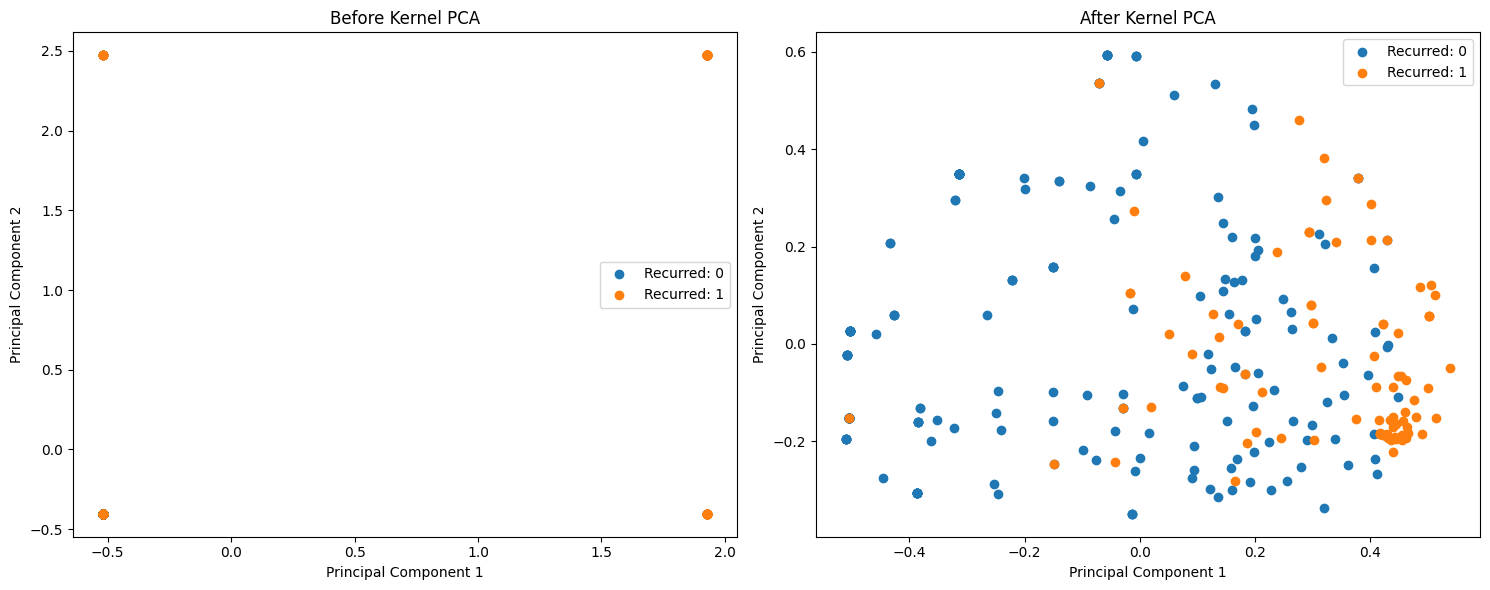

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
# Normaliser les variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer Kernel PCA pour réduire la dimensionnalité sur l'ensemble d'entraînement seulement
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

# Initialiser les classificateurs
svm_model = SVC()
rf_model = RandomForestClassifier()
mlp_model = MLPClassifier(max_iter=1000)

# Entraîner les modèles avec les données avant Kernel PCA
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
mlp_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données avant Kernel PCA
svm_pred = svm_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
mlp_pred = mlp_model.predict(X_test_scaled)

# Calculer les scores d'exactitude sur les données avant Kernel PCA
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

print("SVM Accuracy (before Kernel PCA):", svm_accuracy)
print("Random Forest Accuracy (before Kernel PCA):", rf_accuracy)
print("MLP Accuracy (before Kernel PCA):", mlp_accuracy)

# Entraîner les modèles avec les données après Kernel PCA
svm_model.fit(X_train_kpca, y_train)
rf_model.fit(X_train_kpca, y_train)
mlp_model.fit(X_train_kpca, y_train)

# Faire des prédictions sur les données après Kernel PCA
svm_pred_kpca = svm_model.predict(X_test_kpca)
rf_pred_kpca = rf_model.predict(X_test_kpca)
mlp_pred_kpca = mlp_model.predict(X_test_kpca)

# Calculer les scores d'exactitude sur les données après Kernel PCA
svm_accuracy_kpca = accuracy_score(y_test, svm_pred_kpca)
rf_accuracy_kpca = accuracy_score(y_test, rf_pred_kpca)
mlp_accuracy_kpca = accuracy_score(y_test, mlp_pred_kpca)

print("SVM Accuracy (after Kernel PCA):", svm_accuracy_kpca)
print("Random Forest Accuracy (after Kernel PCA):", rf_accuracy_kpca)
print("MLP Accuracy (after Kernel PCA):", mlp_accuracy_kpca)

# Visualisation des données avant et après Kernel PCA avec légende
plt.figure(figsize=(15, 6))

# Avant Kernel PCA
plt.subplot(1, 2, 1)
for label in df['Recurred'].unique():
    plt.scatter(X_train_scaled[y_train == label, 0], X_train_scaled[y_train == label, 1], label=f'Recurred: {label}')
plt.title('Before Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Après Kernel PCA
plt.subplot(1, 2, 2)
for label in df['Recurred'].unique():
    plt.scatter(X_train_kpca[y_train == label, 0], X_train_kpca[y_train == label, 1], label=f'Recurred: {label}')
plt.title('After Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


SVM Accuracy (before Truncated SVD): 0.8961038961038961
Random Forest Accuracy (before Truncated SVD): 0.8831168831168831
MLP Accuracy (before Truncated SVD): 0.8961038961038961
SVM Accuracy (after Truncated SVD): 0.8831168831168831
Random Forest Accuracy (after Truncated SVD): 0.8441558441558441
MLP Accuracy (after Truncated SVD): 0.8701298701298701


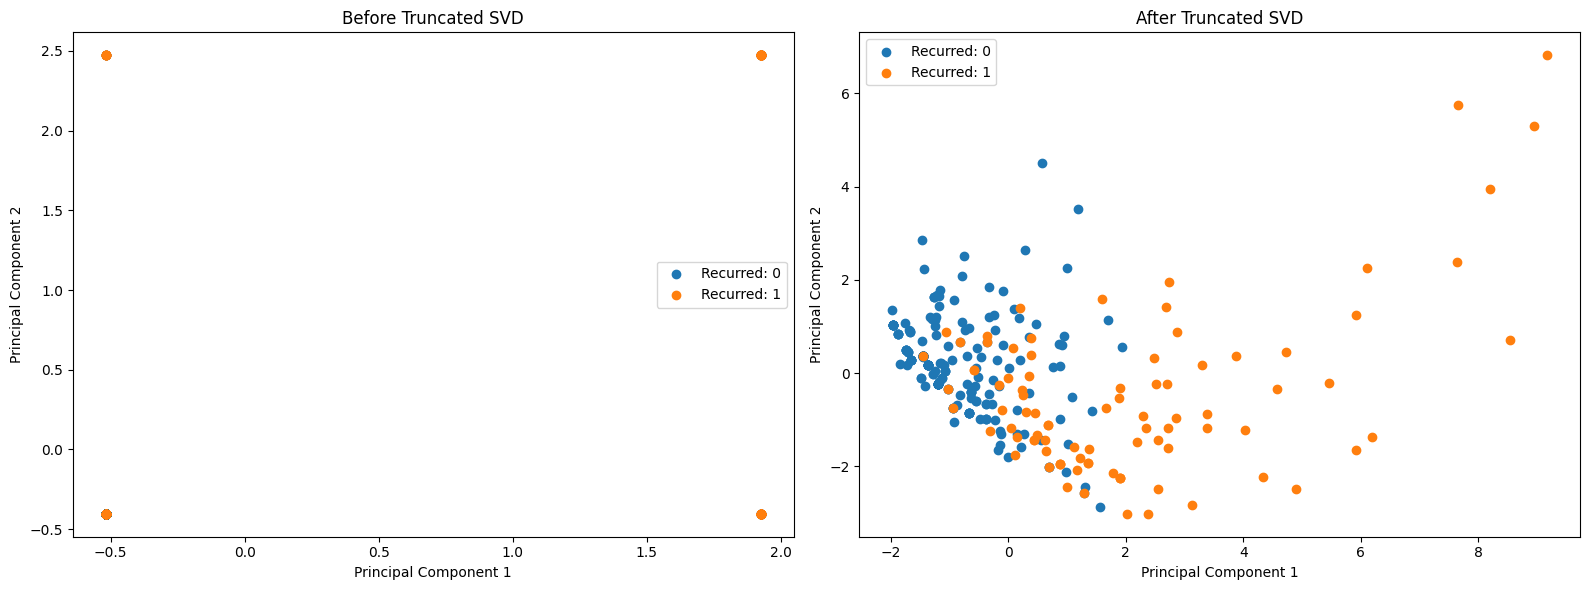

In [41]:
from sklearn.decomposition import TruncatedSVD

# Appliquer Truncated SVD pour réduire la dimensionnalité sur l'ensemble d'entraînement seulement
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

# Entraîner les modèles avec les données avant Truncated SVD
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
mlp_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données avant Truncated SVD
svm_pred_before_svd = svm_model.predict(X_test_scaled)
rf_pred_before_svd = rf_model.predict(X_test_scaled)
mlp_pred_before_svd = mlp_model.predict(X_test_scaled)

# Calculer les scores d'exactitude sur les données avant Truncated SVD
svm_accuracy_before_svd = accuracy_score(y_test, svm_pred_before_svd)
rf_accuracy_before_svd = accuracy_score(y_test, rf_pred_before_svd)
mlp_accuracy_before_svd = accuracy_score(y_test, mlp_pred_before_svd)

print("SVM Accuracy (before Truncated SVD):", svm_accuracy_before_svd)
print("Random Forest Accuracy (before Truncated SVD):", rf_accuracy_before_svd)
print("MLP Accuracy (before Truncated SVD):", mlp_accuracy_before_svd)

# Appliquer Truncated SVD pour réduire la dimensionnalité sur l'ensemble d'entraînement seulement
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

# Entraîner les modèles avec les données après Truncated SVD
svm_model.fit(X_train_svd, y_train)
rf_model.fit(X_train_svd, y_train)
mlp_model.fit(X_train_svd, y_train)

# Faire des prédictions sur les données après Truncated SVD
svm_pred_after_svd = svm_model.predict(X_test_svd)
rf_pred_after_svd = rf_model.predict(X_test_svd)
mlp_pred_after_svd = mlp_model.predict(X_test_svd)

# Calculer les scores d'exactitude sur les données après Truncated SVD
svm_accuracy_after_svd = accuracy_score(y_test, svm_pred_after_svd)
rf_accuracy_after_svd = accuracy_score(y_test, rf_pred_after_svd)
mlp_accuracy_after_svd = accuracy_score(y_test, mlp_pred_after_svd)

print("SVM Accuracy (after Truncated SVD):", svm_accuracy_after_svd)
print("Random Forest Accuracy (after Truncated SVD):", rf_accuracy_after_svd)
print("MLP Accuracy (after Truncated SVD):", mlp_accuracy_after_svd)

# Visualisation avant et après Truncated SVD
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    plt.scatter(X_train_scaled[y_train == label, 0], X_train_scaled[y_train == label, 1], label=f'Recurred: {label}')
plt.title('Before Truncated SVD')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    plt.scatter(X_train_svd[y_train == label, 0], X_train_svd[y_train == label, 1], label=f'Recurred: {label}')
plt.title('After Truncated SVD')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


Analysis of PCA, Kernel PCA, and SVD

1. **PCA**:
   - Before PCA, the SVM, Random Forest, and MLP models achieved high accuracy scores, indicating good generalization capabilities without dimensionality reduction.
   - After PCA, although the performances remain high, a slight decrease is observed, particularly for the Random Forest model.
   - This suggests that PCA can reduce training times and highlight underlying structures, but it also introduces information loss that affects the models' ability to distinguish between classes.

2. **Kernel PCA**:
   - The performance of the models before and after applying Kernel PCA follows similar trends to those observed with linear PCA.
   - Despite introducing a nonlinear mapping with Kernel PCA, the overall model performances remain similar to linear PCA.
   - Neither linear PCA nor Kernel PCA offered significant advantages in improving model performance compared to the original data.

3. **SVD (Singular Value Decomposition)**:
   - The performances of the models before and after applying SVD are comparable to those observed with PCA and Kernel PCA.
   - Although SVD is a different method of dimensionality reduction, its effects on model performances are similar to those of PCA and Kernel PCA.
   - Dimensionality reduction with SVD did not lead to significant improvements in model performance compared to the original data.

In summary, while dimensionality reduction can offer benefits such as reducing training times and highlighting underlying structures, its effectiveness depends on the specific characteristics of the dataset and the models being used. In this scenario, the original high-dimensional data already allowed the models to generalize well, making dimensionality reduction less impactful.